In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('dataset.csv', index_col=0)
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
index = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
data.set_index(index, inplace=True)
data[['Close', 'Open', 'High', 'Low']] = data[['Close', 'Open', 'High', 'Low']].replace(',', '', regex=True).astype(float)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1768 entries, 2013-03-01 to 2018-01-01
Freq: D
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Close                               1768 non-null   float64
 1   Open                                1768 non-null   float64
 2   High                                1768 non-null   float64
 3   Low                                 1768 non-null   float64
 4   Bitcoin Total Transaction Fees USD  1768 non-null   float64
 5   Bitcoin USD Exchange Trade Volume   1768 non-null   float64
 6   Bitcoin Hash Rate                   1768 non-null   float64
 7   Bitcoin Cost Per Transaction        1768 non-null   float64
 8   Bitcoin Number of Transactions      1768 non-null   float64
 9   Cocoa                               1768 non-null   float64
 10  Crude Oil                           1768 non-null   float64
 11  S&P500 Future    

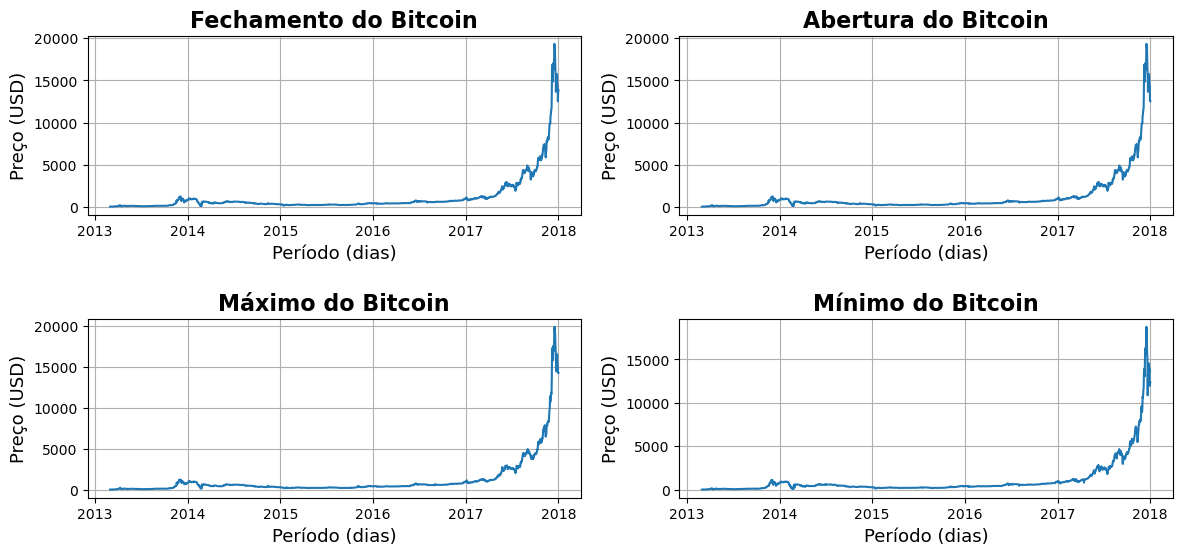

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
fig.subplots_adjust(hspace=0.58)
cols = {
    'Close': 'Fechamento',
    'Open': 'Abertura',
    'High': 'Máximo',
    'Low': 'Mínimo'
}
for i, col in enumerate(list(cols.keys())):
    ax = axes[int(i/2)][i%2]
    ax.set_title(f'{cols[col]} do Bitcoin', fontsize=16, weight='bold')
    ax.plot(data[col])
    ax.set_xlabel('Período (dias)', fontsize=13)
    ax.set_ylabel('Preço (USD)', fontsize=13)
    ax.grid()
    
fig.show();

fig.savefig('figures/bitcoin_ohlc.png')

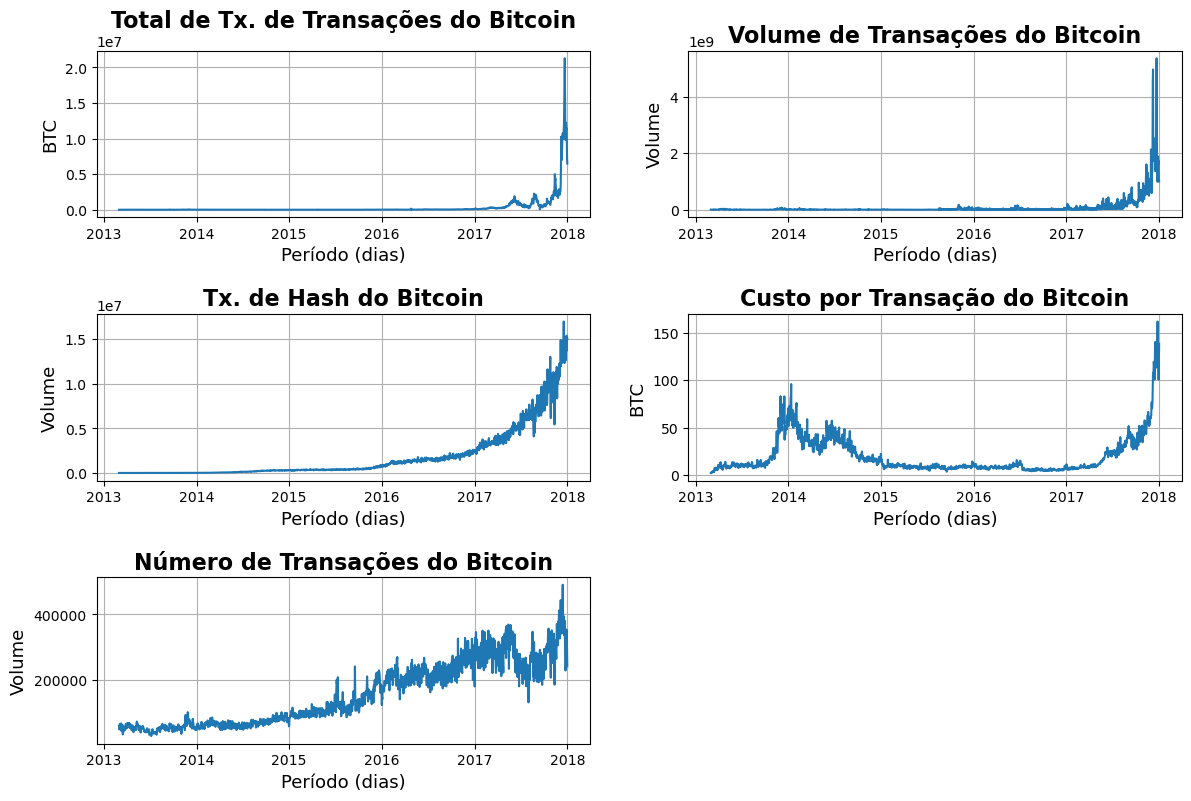

In [4]:
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
fig.subplots_adjust(hspace=0.58)
cols = {
    'Bitcoin Total Transaction Fees USD': 'Tx. Total de Transações',
    'Bitcoin USD Exchange Trade Volume': 'Volume de Transações',
    'Bitcoin Hash Rate': 'Tx. de Hash',
    'Bitcoin Cost Per Transaction': 'Custo por Transação',
    'Bitcoin Number of Transactions': 'Número de Transações'
}

ax = axes[0][0]
ax.set_title('Total de Tx. de Transações do Bitcoin', fontsize=16, weight='bold')
ax.plot(data['Bitcoin Total Transaction Fees USD'])
ax.set_xlabel('Período (dias)', fontsize=13)
ax.set_ylabel('BTC', fontsize=13)
ax.grid()

ax = axes[0][1]
ax.set_title('Volume de Transações do Bitcoin', fontsize=16, weight='bold')
ax.plot(data['Bitcoin USD Exchange Trade Volume'])
ax.set_xlabel('Período (dias)', fontsize=13)
ax.set_ylabel('Volume', fontsize=13)
ax.grid()

ax = axes[1][0]
ax.set_title('Tx. de Hash do Bitcoin', fontsize=16, weight='bold')
ax.plot(data['Bitcoin Hash Rate'])
ax.set_xlabel('Período (dias)', fontsize=13)
ax.set_ylabel('Volume', fontsize=13)
ax.grid()

ax = axes[1][1]
ax.set_title('Custo por Transação do Bitcoin', fontsize=16, weight='bold')
ax.plot(data['Bitcoin Cost Per Transaction'])
ax.set_xlabel('Período (dias)', fontsize=13)
ax.set_ylabel('BTC', fontsize=13)
ax.grid()

ax = axes[2][0]
ax.set_title('Número de Transações do Bitcoin', fontsize=16, weight='bold')
ax.plot(data['Bitcoin Number of Transactions'])
ax.set_xlabel('Período (dias)', fontsize=13)
ax.set_ylabel('Volume', fontsize=13)
ax.grid()
    
# axes[2][1].get_xaxis().set_visible(False)
# axes[2][1].get_yaxis().set_visible(False)
axes[2][1].set_axis_off()
    
fig.show();
fig.savefig('figures/bitcoin_blockchain.png')